In [1]:
from glob import glob

mp3s = glob('/home/husein/ssd2/processed-youtube-asr-v2/*/*.mp3')
mp3s.extend(glob('/home/husein/ssd2/processed-youtube-asr/*/*.mp3'))
len(mp3s)

1274994

In [2]:
from datasets import Audio
from tqdm import tqdm

sr = 16000
audio = Audio(sampling_rate=sr)

ls = 0
for x in tqdm(mp3s):
    ls += (len(audio.decode_example(audio.encode_example(x))['array']) / sr)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 1274994/1274994 [56:10<00:00, 378.32it/s]


In [4]:
ls / 60 / 60

853.6751974646041

In [2]:
import pickle

files = glob('/home/husein/ssd2/processed-youtube-asr-v2/*.pkl')
with open(files[0], 'rb') as fopen:
    data = pickle.load(fopen)
    
data[5:7]

[{'wav_data': '/home/husein/ssd2/processed-youtube-asr-v2/Majlis_Perhimpunan_Dwi_Bulanan_Dan_Pelancaran_Buku_Digital_Pelan_Antirasuah_Organisasi_(OACP)_[oy89sdoYtG8]/5.mp3',
  'start': 700.44,
  'asr_model': (('dari tiada', [0.5978784426634116], [186, 638]),
   ('dari utiara', [0.06576148581927052], [186, 140, 49, 24, 43])),
  'end': 701.94},
 {'wav_data': '/home/husein/ssd2/processed-youtube-asr-v2/Majlis_Perhimpunan_Dwi_Bulanan_Dan_Pelancaran_Buku_Digital_Pelan_Antirasuah_Organisasi_(OACP)_[oy89sdoYtG8]/6.mp3',
  'start': 702.86,
  'asr_model': (('pemanis kata selamat datang awal bismi',
    [0.7002086713961541],
    [411, 5, 233, 92, 662, 238, 608, 245, 17, 222]),
   ('pemanis kata selamat datang awal bismi',
    [0.3254911285461269],
    [411, 5, 233, 92, 662, 238, 608, 245, 17, 222])),
  'end': 705.9}]

In [6]:
data[3]

{'wav_data': '/home/husein/ssd2/processed-youtube-asr-v2/Majlis_Perhimpunan_Dwi_Bulanan_Dan_Pelancaran_Buku_Digital_Pelan_Antirasuah_Organisasi_(OACP)_[oy89sdoYtG8]/3.mp3',
 'start': 697.62,
 'asr_model': (('sirih berlipat',
   [0.30114838606776057],
   [153, 47, 20, 25, 51, 50, 46]),
  ('sirih berlipat', [0.35491282997028284], [153, 47, 20, 25, 51, 50, 46])),
 'end': 698.94}

In [7]:
import IPython.display as ipd
ipd.Audio(data[3]['wav_data'])

In [9]:
from tqdm import tqdm
import numpy as np
import pickle

files = glob('/home/husein/ssd2/processed-youtube-asr-v2/*.pkl')
scores = []

for f in tqdm(files):
    with open(f, 'rb') as fopen:
        data = pickle.load(fopen)
        
    for row in data:
        
        s0 = row['asr_model'][0][1][0]
        s1 = row['asr_model'][1][1][0]
        ss = [s0, s1]
        
        i = np.argmax(ss)
        scores.append(ss[i])

100%|██████████████████████████████████████| 5344/5344 [00:06<00:00, 772.45it/s]


In [10]:
len(scores)

841120

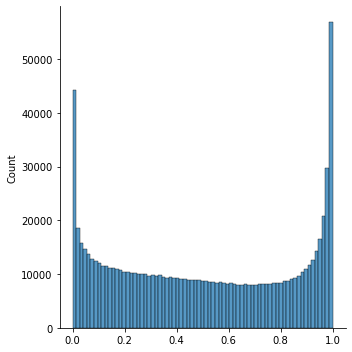

In [11]:
import seaborn as sns

sns.displot(scores)

In [14]:
files = glob('/home/husein/ssd2/processed-youtube-asr-v2/*.pkl')
X, Y = [], []

for f in tqdm(files):
    with open(f, 'rb') as fopen:
        data = pickle.load(fopen)
        
    for row in data:
        
        X.append(row['wav_data'])
        
        s0 = row['asr_model'][0][1][0]
        s1 = row['asr_model'][1][1][0]
        ss = [s0, s1]
        
        i = np.argmax(ss)
        
        Y.append((row['asr_model'][i][0], ss[i]))

100%|██████████████████████████████████████| 5344/5344 [00:07<00:00, 708.30it/s]


In [17]:
len(X)

841120

In [15]:
import json

with open('semisupervised-transducer-v2.json', 'w') as fopen:
    json.dump({'X': X, 'Y': Y}, fopen)

In [19]:
len(Y), len([y for y in Y if y[1] > 0.4])

(841120, 480431)

In [20]:
with open('/home/husein/speech-bahasa/malay-asr-train-shuffled.json') as fopen:
    malay = json.load(fopen)

In [21]:
malay.keys()

dict_keys(['X', 'Y'])

In [22]:
len(malay['X'])

1635599

In [45]:
with open('semisupervised-transducer-v2.json') as fopen:
    semi = json.load(fopen)
    
filtered_X, filtered_Y = [], []
for i in range(len(semi['X'])):
    if semi['Y'][i][1] > 0.6 and len(semi['Y'][i][0]) > 2:
        filtered_X.append(semi['X'][i])
        filtered_Y.append(semi['Y'][i][0])

In [46]:
len(filtered_X), len(filtered_Y)

(344148, 344148)

In [47]:
filtered_X[:5]

['/home/husein/ssd2/processed-youtube-asr-v2/Majlis_Perhimpunan_Dwi_Bulanan_Dan_Pelancaran_Buku_Digital_Pelan_Antirasuah_Organisasi_(OACP)_[oy89sdoYtG8]/4.mp3',
 '/home/husein/ssd2/processed-youtube-asr-v2/Majlis_Perhimpunan_Dwi_Bulanan_Dan_Pelancaran_Buku_Digital_Pelan_Antirasuah_Organisasi_(OACP)_[oy89sdoYtG8]/6.mp3',
 '/home/husein/ssd2/processed-youtube-asr-v2/Majlis_Perhimpunan_Dwi_Bulanan_Dan_Pelancaran_Buku_Digital_Pelan_Antirasuah_Organisasi_(OACP)_[oy89sdoYtG8]/12.mp3',
 '/home/husein/ssd2/processed-youtube-asr-v2/Majlis_Perhimpunan_Dwi_Bulanan_Dan_Pelancaran_Buku_Digital_Pelan_Antirasuah_Organisasi_(OACP)_[oy89sdoYtG8]/14.mp3',
 '/home/husein/ssd2/processed-youtube-asr-v2/Majlis_Perhimpunan_Dwi_Bulanan_Dan_Pelancaran_Buku_Digital_Pelan_Antirasuah_Organisasi_(OACP)_[oy89sdoYtG8]/15.mp3']

In [48]:
ipd.Audio(filtered_X[1])

In [49]:
filtered_Y[:5]

['pinang',
 'pemanis kata selamat datang awal bismi',
 'yang berusaha azmi bin ahmad ketua',
 'warga parlimen malaysia',
 'assalamualaikum warahmatullahi wabarakatuh']

In [50]:
X = malay['X'] + filtered_X
Y = malay['Y'] + filtered_Y

len(X), len(Y)

(1979747, 1979747)

In [51]:
from sklearn.utils import shuffle

X, Y = shuffle(X, Y)

In [ ]:
with open('malay-asr-train-shuffled-combined-semi.json', 'w') as fopen:
    json.dump({'X': X, 'Y': Y}, fopen)